<br><br><br>
<span style="color:red;font-size:60px">Machine learning</span>

<br><br>

<li>Creating programs that learn
<li>The "learned" knowledge is not explicitly contained in the program
<li>The program is designed to learn using <b><span style="color:darkred">real world data</span></b>

<br><br><br>
<span style="color:green;font-size:xx-large">Basic ideas</span>



<li>The program contains a learning algorithm
<li>The program is given data
<li>The program applies the learning algorithm to the data and figures stuff out!

<br><br><br>
<span style="color:green;font-size:xx-large">Types of learning</span>



<li><span style="color:darkblue">Supervised learning</span>: The data set contains paired input and output features and the machine learns how to get the output from the given input. In supervised learning, both input as well as output features are used in learning. Supervised learning is used for <span style="color:darkgreen">prediction</span>
<li><span style="color:darkblue">Unsupervised learning</span>: The data set contains features and the machine tries to induce concepts or knowledge from this feature set. Typically by organizing the data into "like" clusters. In unsupervised learning, only input features are used in learning. Unsupervised learning is used for discovering <span style="color:darkgreen">hidden structures</span> in data
<li><span style="color:darkblue">Reinforcement learning</span>: Software agents that learn how to maximize a reward function in a stochastic environment. Reinforcement learning is used to learn <span style="color:darkgreen">strategies</span> in interactive environments

<br><br><br>
<span style="color:green;font-size:xx-large">Classification</span>



<li>Learn how to classify cases into one of a set of discrete categories</li>
<li>When a new case arrives, predict which category it belongs to</li>
<li><span style="color:darkblue">binary classification</span>: classifies cases into into one of two categories</li>
<li><span style="color:darkgreen">Classification is the most common form of prediction using machine learning</span></li>
<li>Examples:</li>
<ol>
    <li><span style="color:darkblue">credit scoring</span>: classify loan applications into various credit risk categories (or binary loan/don't loan categories)</li>
    <li><span style="color:darkblue">stock picking</span>: classify stocks (or other financial assets) into buy/sell/hold categories</li>
    <li><span style="color:darkblue">optical character recognition</span>: classify images into letters of the alphabet</li>
    <li><span style="color:darkblue">churn</span>: identify which customers are more likely to churn (e.g., cell phone customers)</li>
    <li><span style="color:darkblue">sentence recognition</span>: classify pieces of text into well-formed or not well-formed sentences (used in natural language processing)</li>

<br><br><br>
<span style="color:green;font-size:xx-large">Classification example</span>



<li>Classifying handwritten digits into categories 0 ... 9</li>
<li>We'll use the MNIST database - 70,000 images of digits (<span style="color:green">70,000 cases</span>)</li>
<li>each image is pixelated with 28*28 pixels (<span style="color:green">784 features</span>)</li>
<li>the class (which digit) of each image is known. We can use supervised learning</li>


<h3>Classification ML Models</h3>
<li><a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">logistic regression</a></li>
<li><a href="https://scikit-learn.org/stable/modules/sgd.html">stochastic gradient descent</a></li>
<li><a href="https://scikit-learn.org/stable/modules/tree.html">Decision trees</a> and <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html">random forest classifiers</a></li>
<li><a href="https://scikit-learn.org/stable/modules/svm.html">support vector machines</a></li>
<li><a href="https://scikit-learn.org/stable/modules/naive_bayes.html">naive bayes classifiers</a></li>
<li><a href="https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html">neural network classifiers</a></li>


<li>We will walk through one <i>binary classifier</i> to get a sense for how classification works and what we need to do to evaluate the performance of a classifier</li>

<span style="color:blue;font-size:large">first make sure you're working with the latest version of sklearn</span>

In [1]:
import sklearn
sklearn.__version__ #1.1.3 1.2.1

'1.2.1'

In [2]:
#!pip install scikit-learn --upgrade

<br><br><br>
<h3>Basic data preparation</h3>
<li>Get the data from the appropriate data source</li>
<li>Identify and organize the features and the target</li>
<li>Separate the data into training and testing samples</li>

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
mnist.keys()

/home/leo/anaconda3/lib/python3.9/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


: 

: 

<li><span style="color:green">DESCR</span>: a description of the data</li>
<li><span style="color:green">data</span>: the 70,000 * 784 features data</li>
<li><span style="color:green">target</span>: the 70,000 output feature values</li>


In [ ]:
mnist['data']

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h3>Example of pixelation</h3>
<li>Each sample handwritten digit is divided into 784 (28x28) pixels</li>
<li>The value in each pixel is the amount of shaded area in the pixel (max=255)</li>


In [ ]:
pixels_with_values = [(val[0],val[1]) for val in enumerate(mnist['data'].loc[0]) if val[1] > 0.0]
print(len(pixels_with_values))
print(pixels_with_values)

166
[(152, 3.0), (153, 18.0), (154, 18.0), (155, 18.0), (156, 126.0), (157, 136.0), (158, 175.0), (159, 26.0), (160, 166.0), (161, 255.0), (162, 247.0), (163, 127.0), (176, 30.0), (177, 36.0), (178, 94.0), (179, 154.0), (180, 170.0), (181, 253.0), (182, 253.0), (183, 253.0), (184, 253.0), (185, 253.0), (186, 225.0), (187, 172.0), (188, 253.0), (189, 242.0), (190, 195.0), (191, 64.0), (203, 49.0), (204, 238.0), (205, 253.0), (206, 253.0), (207, 253.0), (208, 253.0), (209, 253.0), (210, 253.0), (211, 253.0), (212, 253.0), (213, 251.0), (214, 93.0), (215, 82.0), (216, 82.0), (217, 56.0), (218, 39.0), (231, 18.0), (232, 219.0), (233, 253.0), (234, 253.0), (235, 253.0), (236, 253.0), (237, 253.0), (238, 198.0), (239, 182.0), (240, 247.0), (241, 241.0), (260, 80.0), (261, 156.0), (262, 107.0), (263, 253.0), (264, 253.0), (265, 205.0), (266, 11.0), (268, 43.0), (269, 154.0), (289, 14.0), (290, 1.0), (291, 154.0), (292, 253.0), (293, 90.0), (319, 139.0), (320, 253.0), (321, 190.0), (322, 2.0),

<li>Each handwriting sample is "marked", i.e., the digit it represents is known</li>
<li>An example of the pixellation and the target is below</li>

In [ ]:
mnist['target']

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [ ]:
def display_digit(digit_number):
    for line in mnist.data.to_numpy()[digit_number].reshape(28,28):
        for num in line:
            if num > 0:
                print('*', end = ' ')
            else:
                print(' ', end = ' ')
        print('')
    print("Actual value: ",mnist.target.to_numpy()[digit_number])
display_digit(32775)

                                                        
                                                        
                                                        
                                                        
                                                        
                  * * * * * * * * * *                   
            * * * * * * * * * * * * * *                 
            * * * * * * * *     * * * *                 
            * * * * *           * * * *                 
            * * *             * * * *                   
                            * * * * *                   
                      * * * * * * *                     
                      * * * * * * * * *                 
                      * * * * * * * * *                 
                      * * *       * * * *               
                                    * * *               
                                      * * *             
                               

<br><br><br>
<span style="color:blue;font-size:large">train, test, and holdout</span>



<li><span style="color:green">training dataset</span>: the dataset that the machine uses to learn whatever it is that it is supposed to learn</li>
<ul><li>Because we're training a model on the data, the model is likely to be "biased" toward the training data</li>
    <li>Consequently, as second dataset, unseen during the training, is used to provide an "unbiased" evaluation of the model performance</li>
</ul>
<li><span style="color:green">validation/testing dataset</span>: the dataset that is used to test how well the machine has learned from the training set (the machine does not learn from this dataset and, therefore, it provides an unbiased evaluation of the model)</li>
<li><span style="color:green">holdout dataset</span>: the ML process is iterative. After multiple training and testing cycles, the data scientist settles on a model. A third dataset is sometimes used to test this final model</li>

<br><br><br>
<span style="color:blue;font-size:large">prepare a train and test dataset</h3>



<h3>Assemble the X and y in a dataframe</h3>
<li>The sample and the target will be aligned in the same row</li>
<li>splitting the data into train and test will be easier</li>
<li>let X be the independent variable dataframe and y the target series</li>
<li>first add target (y) as a new column of X</li>
<li>then use sklearn's train_test_split function to split the set into two</li>
<li>we'll also reduce the datasize to 30% so that the analysis can work in the class!</li>

In [ ]:
import pandas as pd
import numpy as np
X,y = mnist['data'],mnist['target']
#the pd.assign function adds one or more pandas series as a new column(s) to a dataframe
#The function returns a copy
df = X.assign(target = y)

#Randomly sample 30% of the data without replacement (to speed up in class analysis)
df = df.sample(frac=.3,random_state=42)

#Split the data into two dataframes randomly assigning rows to one of two sets
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.3,random_state=3456)


In [ ]:
df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,target
46730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
48393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
41416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
34506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
43725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
19036,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
51256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
48198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


<br><br><br>
<span style="color:green;font-size:xx-large">Basic ML Terminology</span>
<li><span style="color:darkblue">Feature</span>: A (measurable) property of the learning domain
<li><span style="color:darkblue">Feature set</span>: The set of features that are useful for learning in a given domain and a given problem
<ul>
<li>gender, age, income, other demographic data for predicting credit risk
<li>position of pupil, size of nose, presence/absence of dimples in facial data for facial recognition
<li>color, intensity of pixels in image data for image recognition
<li>moving averages, departures, technical indicators, price in stock price prediction
</ul>
<li><span style="color:darkblue">Input features/Independent variables</span>: The observable (useful) features in the domain
<li><span style="color:darkblue">Output features/Dependent variable</span>: A feature that is being learned or predicted
<ul>
<li>In stock price prediction: moving averages, departures, technical indicators may be input features and the future return the output feature
<li>In face recognition: various observable facial features are the input feature and the person (name?) the output feature
</ul>
<li><span style="color:green">variance</span>: an estimate of how much the model metrics (e.g., the mean square error) will change with different data sets. In a good model, the metric values should be the same in the training sample, the testing sample, as well as in all future unseen samples</li>

<li><span style="color:green">overfitting</span>: variance in a dataset comes from two sources: <span style="color:blue">informed features</span> and <span style="color:blue">noise</span>. Informed features are those features that actually explain the target feature. Noise refers to features that happened to co-occur with the target but were not explanatory. But, the machine learns and tests its learning by looking at available data which contains both informed features as well as noise and the danger is that the machine will learn the noise better than the data. When that happens, the model is said to be overfitted and it will not perform well out of sample</li>
<li><span style="color:green">bias</span>: a model that does not capture enough variance (i.e., it misses informed features) is said to be biased. A biased model will not learn well enough to perform out of sample
    <ul>
        <li>For example, a stock prediction model that only uses data from a low interest rate regime will ignore interest rate as an informed feature. The model may not perform well if interest rates rise</li>
    </ul>

<li><span style="color:green">bias-variance tradeoff</span>: we can collect data on many features. The more features that get incorporated into a model, the more likely we are to capture informed features (reducing bias). However, we are also more likely to capture features that are merely noise (increasing the possibility of overfitting). The bias-variance tradeoff is one of the biggest problems in machine learning

<li><span style="color:green">model complexity</span>: model complexity is a factor of the number of features that a model includes (more features = more complex) and the nature of the model itself (a linear model is less complex than a non-linear one)
    
<li><span style="color:green">linear models</span>: models that learn a linear relationship between the input features 

<li><span style="color:green">regularization</span>: a technique used to penalize complexity in a model. Model complexity leads to overfitting and regularization is used to decrease the probability of that happening. 


<li><span style="color:green">regression</span>: a linear model that estimates the coefficients of a line $$ y = { \alpha + \beta_1}x_1 + {\beta_2}x_2 + ..... + {\beta_n}x_n + {\epsilon} $$ by minimizing the <span style="color:blue">sum of square differences</span> between the actual and estimated target values</li>

<li><span style="color:green">regularized regression</span>: regression which explicitly penalizes high betas in the estimated line to reduce the complexity of the model</li>

<li><span style="color:green">logistic regression</span>: regression that classifies data into two categories (binary - 0/1 - classification) using a "logit model". Roughly (definitely not exactly!), in logistic regression, the model assumes a linear relationship between input features and the probability that the output value is 1. A threshold value then determines whether the estimate is a 0 or a 1. </li>

<img src="bias_variance.png">

<h2>Our problem</h2>
<li>We'll build a simple binary classifier using this handwritten digits data</li>
<li><b>Our question</b>: How well does our classifier do in identifying whether a particular digit is an 8 or is not an 8</li>
<li>We'll use the stochastic gradient descent classifier</li>

<br><br><br>
<span style="color:green;font-size:xx-large">Stochastic gradient descent classifier</span>



<li>gradient descent is used to move incrementally toward the solution, always moving in the direction of the optimal solution</li>
<li>rough example of SGD and linear regression:</li>
<ol>
    <li>parameterize the linear function with a set of beta values</li>
    <li>estimate the cost (actual - target) for one, randomly sampled, example</li>
    <li>update the model parameters using an <b>update rule</b> (see the <a href="https://scikit-learn.org/stable/modules/sgd.html#mathematical-formulation">mathematical formulation of SGD</a> for details)</li>
    <li>Repeat for other examples until a stopping rule (number of iterations/prediction error/change in prediction error/etc.) is activated</li>
<li>easy to generalize this procedure for any cost function (that is differentiable)</li>

<br><br><br>
<span style="color:blue;font-size:large">Training the SGD classifier</span>



<li>set up the train and test data
<li>first, create a binary True/False column as the new target feature</li>
<li>import the SGDClassifier model from sklearn</li>
<li><a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html">https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html</a></li>
<li><a href="https://scikit-learn.org/stable/modules/sgd.html#sgd">stochastic gradient descent user guide</a></li>
<li>shuffle the data</li> 
<li>parameterize the model</li>
<li><span style="color:green">fit</span> the model</li>

    

<br><br><br>
<span style="color:blue;font-size:large">Binary classification with Stochastic Gradient Descent</span>



<li>Let's see if we can classify digits as 8 or not 8</li>
<li>first, we need to transform the y value from 0, 1, ,2, ... to True or 1 (is a 8) or False or 0 (is not a 8)</li>
<li>use a boolean mask as the target</li>

In [ ]:
#Create a binary column
train['y'] = (train['target'] == '8')
test['y'] = (test['target'] == '8')


In [ ]:
#shuffle training data and extract X and y (sample defaults to without replacement)
#shuffling is useful in case there is serial correlation in the data 

train = train.sample(frac=1.0,random_state=42) 
X_train = train.iloc[:,0:784]
y_train = train['y']

In [ ]:
#set up the test set
X_test = test.iloc[:,0:784]
y_test = test['y']

<br><br><br>
<span style="color:blue;font-size:large">Fit the data to the model</span>
<li>Fitting, in ML, is the process of estimating the parameters of the model</li>
<li>In linear regression, the parameters are alpha and the betas</li>
<li>Regardless of the actual ML model being used, the process is the same</li>
<ul>
    <li>Create a model object with hyperparameter values</li>
    <li>Fit the training data</li>
    <li>Evaluate the model</li>

In [ ]:
from sklearn.linear_model import SGDClassifier

#Create a model object. Parameters of the model object are known as hyper parameters
clf = SGDClassifier(random_state=42,max_iter=200,loss="log_loss",alpha=5.0) 

#Fit the data to the model. This estimates the model parameters 
#Model parameters and hyper parameters are different (more on this later)
clf.fit(X_train,y_train)

SGDClassifier(alpha=5.0, loss='log_loss', max_iter=200, random_state=42)

<br><br><br>
<span style="color:green;font-size:xx-large">Evaluating a binary classifier</span>



<li>eyeball predictions</li>
<li>cross-validation</li>
<li>accuracy</li>
<li>confusion matrices</li>
<li>precision/recall</li>
<li>ROC curve</li>

<li>the <span style="color:green">predict</span> function returns predicted y values given a set of X values</li>
<li>Let's check a couple of data points to see if the predictions are correct</li> 

In [ ]:
clf.predict(X_test[:20])

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True])

In [ ]:
y_test.iloc[:20]

46183    False
12639    False
51323    False
748      False
38497    False
14278    False
52842    False
46655    False
19735    False
39022    False
45473    False
67843    False
43190    False
49053    False
2351     False
21978    False
17119    False
48188    False
12462    False
19223     True
Name: y, dtype: bool

<br><br><br>
<span style="color:blue;font-size:large">hmm. so far so good!</span>
<li>but, eyeballing a couple of cases is not a good evaluation mechanism</li>
<li>or, the plural of anecdote is not data!</li>


<br><br><br>
<span style="color:green;font-size:xx-large">Formal metrics for evaluating a binary classifier</span>

<br><br><br>
<h2 style="color:blue;">Classification Model evaluation: Confusion matrix</h2>



<li>A confusion matrix evaluates each data point in the testing dataset to see which of the following categories it falls into: 
<ol>
<li><span style="color:blue">true positive</span>: model predicts a 8 and it is an 8
<li><span style="color:blue">false positive</span>: model predicts a 8 but it is a not 8
<li><span style="color:blue">true negative</span>: model predicts a not 8 and it is a not 8
<li><span style="color:blue">false negative</span>: model predicts a not 8 and it is actually an eight
</ol>
<li>It then reports the number (or proportion) of cases in each category

<li>the structure of the confusion matrix is:</li>
<table>
    <tr><td></td><th>predicted negatives</th><th>predicted positives</th></tr>
    <tr><th>actual negatives</th><td>true negative</td><td>false positive</td></tr>
    <tr><th>actual positives</th><td>false negative</td><td>true positive</td></tr>
</table>


In [ ]:
#from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_pred = clf.predict(X_train)
cfm = confusion_matrix(y_train,y_train_pred)
cfm

array([[13038,   277],
       [  379,  1006]])

In [ ]:
#from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_test_pred = clf.predict(X_test)
cfm = confusion_matrix(y_test,y_test_pred)
cfm

array([[5554,  139],
       [ 205,  402]])

<br><br><br>
<span style="color:blue;font-size:large">Confusion matrix metrics</span>



Using the results of the confusion matrix, we can calculate a number of metrics that will help evaluate the model
<ol>
<li><span style="color:blue">true positive rate</span> or <span style="color:blue">sensitivity</span> or <span style="color:blue">recall</span>
<li><span style="color:blue">true negative rate</span> or <span style="color:blue">specificity</span>
<li><span style="color:blue">false positive rate</span> or <span style="color:blue">fall out</span>
<li><span style="color:blue">precision</span> or <span style="color:blue">positive predictive value</span>
<li><span style="color:blue">f-score</span>
<li><span style="color:blue">accuracy</span>
<li><span style="color:blue">misclassification rate</span>


</ol>
<li>Note that our positive values are "is a 8" and negative values are "is not a 8"</li>

In [ ]:
tn, fp, fn, tp = cfm.ravel() #ravel flattens an array
print("%-50s\t%d"%("Not 8 correctly classified as not 8 (tn)",tn))
print("%-50s\t%d"%("Not 8 incorrectly classified as a 8 (fp)",fp))
print("%-50s\t%d"%("8 incorrectly classified as not 8 (fn)",fn))
print("%-50s\t%d"%("8 correctly classified as a 8 (tp)",tp))

Not 8 correctly classified as not 8 (tn)          	5554
Not 8 incorrectly classified as a 8 (fp)          	139
8 incorrectly classified as not 8 (fn)            	205
8 correctly classified as a 8 (tp)                	402


In [ ]:
ax=np.array([[1,2,3],[4,5,6]])
np.ravel(ax)

array([1, 2, 3, 4, 5, 6])

<br><br><br>
<span style="color:blue;font-size:large">True Positive rate/sensitivity/recall</span>



True Positive Rate is the proportion of positive cases that are correctly identified as positive
$$ tpr = \frac{tp}{(tp + fn)} $$
Sensitivity is a measure of how good our model is in identifying the positive condition. A value of 1, for example, will mean that every positive value (every eight) was correctly idenfified by the model. 
<li>Percentage of persons with COVID correctly identified as having COVID
<li>Percentage of "fake news" items correctly identified as fake news
<li>Percentage of consumers who click on an ad and the model correctly predicts they will click on the ad
<li>Percentage of customers who churn (move to a new carrier) and the model correctly predicts they will churn
<li><b>Note that the true positive rate can be made high by just guessing that every case is positive</b></li>

In [ ]:
tpr = tp/(tp+fn) #note that the denominator is the number of 8s
print("Percentage of eights correctly identified as eights:",tpr)

Percentage of eights correctly identified as eights: 0.6622734761120264


<br><br><br>
<span style="color:blue;font-size:large">True Negative Rate or Specificity</span>



True Negative Rate is the proportion of negative cases that are correctly identified as negative
$$ tpr = \frac{tn}{(tn + fp)} $$
<li>Proportion of cases that are COVID free that are correctly identified as COVID free</li>
<li>Proportion of real news stories that are correctly identified as real news
<li>Proportion of healthy people that are correctly identified as healthy
<li><b>Note that this will be 1 if everything is guessed as a non-8</b>

In [ ]:
tnr = tn/(tn+fp) #note that the denominator is the number of non-8s
print("percentage of estimated non-8s correctly identified",tnr)

percentage of estimated non-8s correctly identified 0.975584050588442


<br><br><br>
<span style="color:blue;font-size:large">false positive rate or "fall out"</span>



The false positive rate is the proportion of negative cases that have been identified as positives
$$ fpr = \frac{fp}{(fp + tn)} $$

<li>Proportion of people who don't have COVID but the model says they do</li>
<li>Proportion of true news items that are identified as fake news
<li>Proportion of consumers who won't use a discount but are identified as target discount users
<li>equals 1-tnr


In [ ]:
fpr = fp/(fp+tn) #note that the denominator is the number of non 8s
print("the proportion of non 8s misclassified as an 8",fpr)


the proportion of non 8s misclassified as an 8 0.024415949411558054


<br><br><br>
<span style="color:blue;font-size:large">Precision</span>



Precision measures the proportion of cases identified as positive that are actually positive
$$ precision = \frac{tp}{(tp + fp)} $$
<li>Proportion of people that the model says have COVID and they actually have COVID</li>
<li>Proportion of news items that are actually fake from amongst all the news items that are identified as fake
<li>Proportion of "churners" that are actual churners from amongst all customers identifed as churners
<li>Proportion of actual 8s amongst all things that are identified as 8s
<li><b>Note that if we predict exactly one case as positive, and that case is actually positive, precision will be 100%</b>

In [ ]:
precision = tp/(tp+fp) #note that the denominator is all things classified as a 8
print("proportion of cases identified as 8s that are actually 8s",precision)

proportion of cases identified as 8s that are actually 8s 0.7430683918669131


<br><br><br>
<span style="color:blue;font-size:large">f-score</span>



<li>Precision tells us how well our model discriminates amongst cases it identifies as positive. A precision of 1 would mean that if our model says something is positive, it is definitely a positive. 
<li>Recall (true positive rate) tells us how good the model is at finding positives (a recall of 1 would mean it has found all positives). <li>Precision does not tell us how good we are at finding positives while recall does not tell us how good our model is at disciminating
<li>We can increase recall by increasing the number of positive predictions, but this will hurt precision</li>
<li>We can increase precision by decreasing the number of positive predictions and (hopefully) being more correct, but this will hurt recall</li>
<li>The f-score combines the two into a single score using the harmonic mean of the two numbers to help trade-off the two scores:
    
$$ F = 2\frac{precision * recall}{(precision + recall)} $$


In [ ]:
f = precision*tpr/(precision+tpr)*2
print(f)

0.7003484320557491


<br><br><br>
<span style="color:blue;font-size:large">accuracy</span>



Accuracy measures how accurately the model classifies things as positive or negative (8s or non 8s)
$$accuracy = \frac{tp + tn}{(tp+tn+fp+fn)} $$
An accuracy of 1 would mean that our model has classified everything correctly

In [ ]:
accuracy = (tp+tn)/(tp+tn+fp+fn)
print("classification accuracy",accuracy)

classification accuracy 0.9453968253968253


<br><br><br>
<span style="color:blue;font-size:large">misclassification rate</span>



Misclassifican rate is the inverse of accuracy. What proportion of the cases are misclassified?
$$ misclassificationRate = \frac{fp + fn}{(tp+tn+fp+fn)} $$


In [ ]:
misclassification_rate = (fp + fn)/(tp+fp+tn+fn)
print("proportion misclassified",misclassification_rate)

proportion misclassified 0.054603174603174605


<br><br><br>
<span style="color:blue;font-size:large">Summarizing our results</span>


In [ ]:
accuracy = (tp+tn)/(tp+tn+fp+fn)
print("ACCURACY: correctly assigning a category",accuracy)
tpr = tp/(tp+fn) #note that the denominator is the number of 8s
print("RECALL/TPR: proportion of 8s correctly identified:",tpr)
precision = tp/(tp+fp) #note that the denominator is all things classified as an 8
print("PRECISION: proportion of things identified as 8 that are 8",precision)
tnr = tn/(tn+fp) #note that the denominator is the number of non-8s
print("SPECIFICITY/TNR: percentage of non-8s correctly identified",tnr)
f = f = precision*tpr/(precision+tpr)*2
print("F1 SCORE: ",f)


ACCURACY: correctly assigning a category 0.9453968253968253
RECALL/TPR: proportion of 8s correctly identified: 0.6622734761120264
PRECISION: proportion of things identified as 8 that are 8 0.7430683918669131
SPECIFICITY/TNR: percentage of non-8s correctly identified 0.975584050588442
F1 SCORE:  0.7003484320557491


<br><br><br>
<span style="color:green;font-size:xx-large">Model Selection Strategies</span>

<li>Some binary classification models like the SGD (with log loss) can compute predictions as probabilities </li>
<li>A <span style="color:blue">loss function</span> in regression models is used to calculate the prediction error</li>
<li>Sklearn then picks the 0.5 as a threshhold</li>
<li>Values above 0.5 are predicted as positive while values below 0.5 are predicted as negative</li>
<li>By varying the threshhold, it is possible to vary the precision, recall, accuracy etc.</li>

<h3>Evaluate the model</h3>


<h4>On training data</h4>

In [ ]:
clf

SGDClassifier(alpha=5.0, loss='log_loss', max_iter=200, random_state=42)

In [ ]:
from sklearn.metrics import precision_score,recall_score,accuracy_score
y_train_pred = clf.predict(X_train)
accuracy = accuracy_score(y_train,y_train_pred)
recall = recall_score(y_train,y_train_pred)
precision = precision_score(y_train,y_train_pred)
accuracy, recall, precision

(0.9553741496598639, 0.7263537906137184, 0.784099766173032)

<h4>On testing data</h4>

In [ ]:
y_test_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test,y_test_pred)
recall = recall_score(y_test,y_test_pred)
precision = precision_score(y_test,y_test_pred)
accuracy, recall, precision

(0.9453968253968253, 0.6622734761120264, 0.7430683918669131)

<h4>Getting the probabilities</h4>
<li><span style="color:green">predict_proba</span> works like predict but returns the probability of each class for each case </li>


In [ ]:
prediction_probabilities = clf.predict_proba(X_train)
prob_array = prediction_probabilities[:,1]
prob_array

array([2.04812033e-04, 4.58029591e-03, 6.33005650e-04, ...,
       9.64064907e-02, 6.13957514e-01, 2.48335142e-03])

In [ ]:
prob_array.max(),prob_array.min(),prob_array.mean()

(0.9998077399948154, 1.6662230363607759e-12, 0.11149675030419366)

<h3>Now, we can see how the metrics change with changes in the threshold</h3>

In [ ]:
for threshold in (0.05, 0.4, 0.5, 0.6, 0.8, 0.9):
    print(threshold)
    y_pred_revised = prob_array > threshold
    print("precision: ", precision_score(y_train, y_pred_revised)) #originally 75%
    print("recall: ",recall_score(y_train, y_pred_revised)) #originally 88%
    print("accuracy: ", accuracy_score(y_train, y_pred_revised)) #originally 97%
    print("\n\n")

0.05
precision:  0.3012699905926623
recall:  0.9249097472924188
accuracy:  0.7908163265306123



0.4
precision:  0.7187079407806191
recall:  0.7711191335740072
accuracy:  0.95



0.5
precision:  0.784099766173032
recall:  0.7263537906137184
accuracy:  0.9553741496598639



0.6
precision:  0.8322869955156951
recall:  0.6700361010830325
accuracy:  0.9561904761904761



0.8
precision:  0.910941475826972
recall:  0.5169675090252708
accuracy:  0.9497278911564626



0.9
precision:  0.9397810218978102
recall:  0.37184115523465705
accuracy:  0.9385714285714286





In [ ]:
prediction_probabilities_test = clf.predict_proba(X_test)
prob_array_test = prediction_probabilities_test[:,1]
prob_array_test
for threshold in (0.1,0.2, 0.4, 0.5, 0.6, 0.8, 0.9):
    print(threshold)
    y_pred_revised = prob_array_test > threshold
    print("precision: ", precision_score(y_test, y_pred_revised)) #originally 75%
    print("recall: ",recall_score(y_test, y_pred_revised)) #originally 88%
    print("accuracy: ", accuracy_score(y_test, y_pred_revised)) #originally 97%
    print("\n\n")

0.1
precision:  0.38130563798219586
recall:  0.8467874794069192
accuracy:  0.8528571428571429



0.2
precision:  0.5229455709711847
recall:  0.8072487644151565
accuracy:  0.9104761904761904



0.4
precision:  0.6875
recall:  0.7067545304777595
accuracy:  0.9407936507936508



0.5
precision:  0.7430683918669131
recall:  0.6622734761120264
accuracy:  0.9453968253968253



0.6
precision:  0.8013100436681223
recall:  0.6046128500823723
accuracy:  0.9474603174603174



0.8
precision:  0.9057239057239057
recall:  0.443163097199341
accuracy:  0.9419047619047619



0.9
precision:  0.9406392694063926
recall:  0.3393739703459638
accuracy:  0.9342857142857143





<br><br><br>
<span style="color:red;font-size:x-large">precision-recall tradeoff</span>



<li>we can increase precision by focusing on correctly identifying 8s while identifying fewer 8s overall</li>
<li>but this will decrease recall because we'll be missing a lot of actual 8s</li>
<li>generally, precision and recall trade each other off</li>
<li>sometimes, we want higher precision (e.g., if we're identifying spam emails but are unwilling to mark a non-spam email as spam)</li>
<li>sometimes, we want higher recall (e.g., if we want to find the effective set of customers for a discount but don't care if a few not so good customers end up in that set)</li>


<li>sklearn also constructs a precision_recall_curve giving the precision and recall at each threshold value</li>
<li>we can use this, along with the scores to actively tradeoff precision and recall</li>


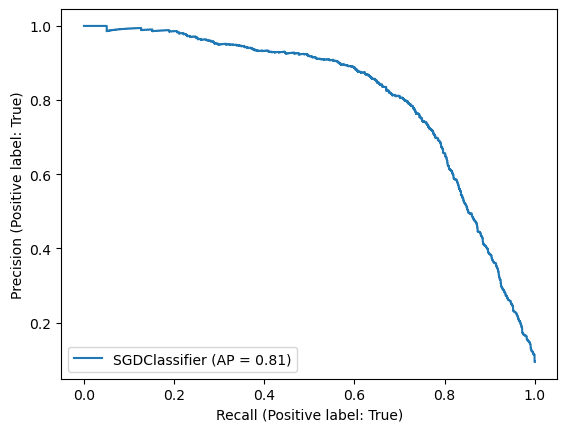

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(clf, X_train, y_train)

<b>Average Precision (AP)</b> is the weighted mean of precisions at each threshold; the weight is the increase in recall from the prior threshold

<li>The interpretation of average precision is that a high AP value indicates that the model is doing a good job of identifying positives while minimizing false positives. Roughly speaking, as the threshold goes down, the recall increases by x% and the precision decreases by y%. A high average precision indicates that y% is consistently less than x% (the gain in recall does not come with a higher loss in precision)</li>
<li>The average precision metric can be used to compare models and can be used to set a threshold that trades off precision with recall (depending on what makes sense in the problem domain)</li>

<li>In our model, we don't have much room for improvement since the precision remains high and drops off only close to very low threshold values</li>
<li>But, if precision is more important than recall, we can go for a very high threshold value with gains in precision without much loss in recall</li>
<li>this is supported, not only by the calculations, but also by the high AP score</li>

<br><br><br>
<span style="color:green;font-size:xx-large">ROC: Receiver Operating Characteristic (ROC)</span>



<span style="color:red;font-size:x-large">
Trading off true positive rate and false positive rate</span>



<li>the true positive rate (recall or the proportion of actual 8s we identify as 8s) and false positive rate (what proportion of non-8s we have identified as 8s) compete</li>
<li>we can increase the true positive rate by using a model that says every case is a positive</li>
<li>but that will increase the false positive rate as well</li>
<li>trade-off between the two is done using ROC (Receiver Operating Characteristic) curves

<li>ROC is a way of measuring the efficacy (goodness) or a model</li>
<li>ROC is primarily used to compare models (and compare a model against a random classifier)</li>
<li>The ROC curve pairs the (TPR, FPR) at each threshold point and plots a line with the FPR on the x-axis and the TPR on the y-axis</li>
<li>The <span style="color:blue">area under the curve (auc)</span> of this line gives us a measure of the efficacy of the model</li>
<ul>
    <li>AUC of 0.5 tells us that our machine is no better than a random positive/negative picker</li>
    <li>AUC of 1.0 tells us that our machine is the perfect classifier</li>
</ul>
<li>At the lower threshold values, both fpr and tpr will be high </li>
<ul>
    <li>since almost all cases will be predicted as positive the tpr will be high</li>
    <li>since almost all non-positive cases will be predicted as positive the fpr will be high</li>
</ul>
<li>At the higher threshold values, both fpr and tpr will be low</li>
<ul>
    <li>since almost all cases will be predicted as negative the fpr will be low</li>
    <li>since almost all positive cases will be predicted as negative the tpr will be low</li>
</ul>
<p></p>
<img src="roc.png">

<h4>Best model ROC curve</h4>

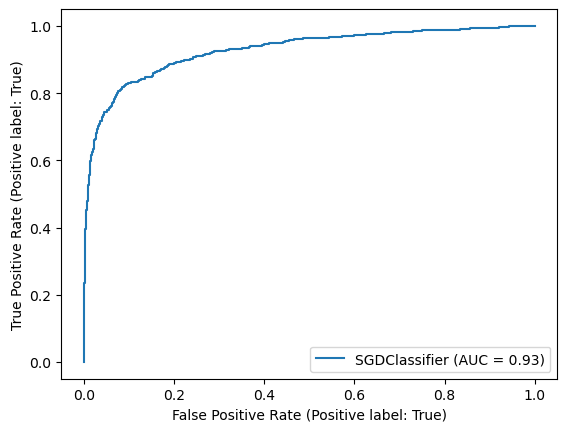

In [ ]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(clf,X_test, y_test)

#RocCurveDisplay.from_predictions(y_train,prob_array)

<span style="color:red;font-size:x-large">reading the ROC curve</span>



<li>Take the point on the curve where the TPR is 0.9</li>
<li>At the threshold at this point, we've identified 90% of the true positives</li>
<li>and have a FPR of arould .2</li>
<li>fpr = 1-tnr, so the tnr = 0.80, or we've correctly identified 80% of non 8's as non 8</li>
<li>as the tpr goes up, the tnr goes down (which leads us to the case where tpr=100% and tnr=0%)</li>

<h3>Understanding AUC</h3>
<li>AUC tells us how well our model separates positive and negative cases</li>
<li>Consider the following probabilities assigned to each case by a classification model (sorted by prob) and the corresponding actual y values</li>
<pre>
(0.15, 0.19, 0.26, 0.41, 0.44, 0.57, 0.65, 0.73, 0.88, 0.91)
(F, F, F, T, T, T, T, T, T, T)


</pre>
Since the model can pick a threshold (e.g., 0.3) that will clearly separate the negatives from the positives, the model predictions will be:
<pre>
(0.15, 0.19, 0.26, 0.41, 0.44, 0.57, 0.65, 0.73, 0.88, 0.91)
(F, F, F, T, T, T, T, T, T, T)


</pre>

with an accuracy of 100%, the AUC of this model is 1.0. Our model can cleanly separate the positive an negative cases
    

Now consider this slightly tweaked version
<pre>
(0.15, 0.19, 0.26, 0.41, 0.44, 0.57, 0.65, 0.73, 0.88, 0.91)
(F, T, F, F, T, T, T, T, T, T)

</pre>
In this model, there is no threshold that will cleanly separate the positive and negative cases If, for example, we choose a threshold of 0.42, the model predicts:
<pre>
(F, F, F, F, T, T, T, T, T, T)
</pre>
with an accuracy of 90% (it gets 9 right and 1 wrong)



<h3>Calculating the AUC</h3>


In [ ]:
import itertools
target = (0, 1, 0, 0, 1, 1, 1, 1, 1, 1)
probs = (0.15, 0.19, 0.26, 0.41, 0.44, 0.57, 0.65, 0.73, 0.88, 0.91)
paired = list(zip(target,probs))

#Separate the data into two sets
#set1 contains the data with actual value 1 and the model determined probability
#set2 contains the data with actual value 0 and the model determined probability
set1 = [p for p in paired if p[0]==1]
set0 = [p for p in paired if p[0]==0]

#Compute the cross product of all pairs (7 1's * 3 0's gives 21 pairs)
all_pairs = list(itertools.product(set1, set0))

#Create three sets (only 2 are necessary)
#A pair is concordant if the probability of the 1 is greater than the prob of the 0
#A pair is discordant if the probability of the 0 is greater than the prob of the 1
#A pair is tied if the probabilities are equal
concordant_pairs = [p for p in all_pairs if p[0][1]>p[1][1]]
discordant_pairs = [p for p in all_pairs if p[1][1]>p[0][1]]
tied_pairs = [p for p in all_pairs if p[0][1]==p[1][1]]

#Get the percent of concordant, discordant and tied
percent_concordant = 100*len(concordant_pairs)/len(all_pairs)
percent_discordant = 100*len(discordant_pairs)/len(all_pairs)
percent_tied = 100*len(tied_pairs)/len(all_pairs)

#Calculate the AUC
auc = (percent_concordant + 0.5*percent_tied)/100
auc

0.9047619047619048

<h3>Question</h3>
<li>Why is the AUC 0.5 with a random model?</li>

<span style="color:red;font-size:x-large">What ROC curves bring to the table</span>



<li>the AUC gives a quick estimate of the skill of the model in prediction because it tells us how good the model is at separating 1s and 0s</li>
<li>ROC curves from different models can be visually compared to see which models are better (more skillful)</li>
<li>Note that at a threshold of 0.5, a less skilled number may have a higher metric (e.g., accuracy) value. But the model skill is more important because a more skilled model is more likely to do better on unseen data</li>

<span style="color:red;font-size:x-large">ROC curves vs. Precision/Recall curves</span>



<li>prefer ROC curves when the two binary value cases are relatively balanced in the dataset</li>
<ul>
    <li>If the data is unbalanced, the AUC will be high cases are skewed toward one side or the other (think of the cross product above)</li>
    <li>But, you should use the AUC to <b>compare</b> models</li>
    <li>Also note that model accuracy may be unhelpful</li>
    </ul>

<li>if the cases are unbalanced, prefer the model with the right mix of high precision and high recall</li>
<li>Note that both precision as well as recall are positive case focused (no negatives in the calculation)</li>
<li>Skewed models tend to have many negatives and few positives</li>
<ul>
    <li>precision will give an estimate of the probability that what the model says is positive is actually a positive</li>
    <li>recall will tell us how good a model is at finding a positive (from amongst all actual positives)</li>
    <li>focus on recall when the <b>cost of a false negative</b> (i.e., a positive is identified as a negative) is high</li>
    <ul>
        <li>Example: Fradulent bank transactions. A bank does not want to misclassify a fradulent transaction as non-fradulent because it may end up costing them money. Here, the focus should be on recall</li>
    </ul>
    <li>focus on precision when the <b>cost of a false positive is high</b></li>
    <ul>
        <li>Example: Recommendation systems. It is better not to recommend a movie than to recommend a movie that the user won't like. If you make many bad recommendations (false positives), the user loses interest and you'll end up losing the user</li>
    </ul>
</ul>


<br><br><br>
<h1>Cross-validation</h1>



<li>cross validation is a technique used to measure how well a model will perform out of sample by looking only at in-sample data</li>
<li>often used when there is insufficient data</li>
<li>or when the data is segmented (e.g., demographic data from different states)</li>
<li>procedure:</li>
<ol>
    <li>split the data into k-groups (aka k-folds)</li>
    <li>train the model on k-1 folds</li>
    <li>calculate an appropriate metric on the k-th fold</li>
    <li>repeat this process on all combinations of (k-1,1) fold sets</li>
    <li>report the average (and variance) of those averages as the performance measure</li>
</ol>

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
mnist.keys()

import pandas as pd
import numpy as np
X,y = mnist['data'],mnist['target']
#the pd.assign function adds one or more pandas series as a new column(s) to a dataframe
#The function returns a copy
df = X.assign(target = y)

#Randomly sample 30% of the data without replacement
df = df.sample(frac=.3,random_state=42)

#Split the data into two dataframes randomly assigning rows to one of two sets
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.3,random_state=3456)


/home/leo/anaconda3/lib/python3.9/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


: 

: 

In [ ]:
train['y'] = (train['target'] == '8')
test['y'] = (test['target'] == '8')
train = train.sample(frac=1.0,random_state=42) 
X_train = train.iloc[:,0:784]
y_train = train['y']
X_test = test.iloc[:,0:784]
y_test = test['y']

<li><a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html">Stratified K-fold</a></li>
<li>StratifiedKFold preserves the ratio of positive and negative cases in each target value</li>

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
nfolds = 3
skf = StratifiedKFold(n_splits=nfolds,random_state=42,shuffle=True)
skf

<br><br><br>
<span style="color:blue;font-size:large">3-fold cross validation </span>



<li>Divide the data into three sets: set1,set2,set3</li>
<li>train on set1+set2 and test on set3 get score1</li>
<li>train on set1+set3 and test on set2 get score2</li>
<li>train on set2+set3 and test on set1 get score3</li>
<li>Note that each of score1, score2 and score 3 are calculated on data NOT used for training!</li>
<img src="crossval.png">

<br><br><br>
<span style="color:blue;font-size:large">Cross validation on the handwritten digits model</span>

In [ ]:
#Number the index from 0..n 
#sklearn cross validation requires sequential numbering!
X_train.index=range(len(X_train))
y_train.index=range(len(y_train))


<li><span style="color:green">skf.split</span> splits the data into k sets of (k-1) and 1 and returns the indices of each paired data set</li>
<li><span style="color:green">X_train_folds, X_test_folds = X.loc[train_index], X.loc[test_index]</span> extracts the training and testing input feature sets</li>
<li><span style="color:green">clone(clf)</span> makes a copy of the SGDClassifier</li>
<li><span style="color:green">clone_clf.fit(X_train_folds,y_train_folds)</span> fits the training data (the k-1 folds)</li>
<li><span style="color:green">clone_clf.predict(X_test_folds)</span> returns the predictions on the testing (the k-th) fold</li>
<li><span style="color:green">(predictions == y_test_folds).sum()/len(predictions)</span> returns the accuracy of the model</li>

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
mean_accuracy = 0
for train_index, test_index in skf.split(X_train, y_train):
    print("Train size:",len(train_index),"Test size:",len(test_index))
    X_train_fold, X_test_fold = X_train.loc[train_index], X_train.loc[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
    clf_cv = SGDClassifier(random_state=42,max_iter=200)
    clf_cv.fit(X_train_fold,y_train_fold)
    predictions = clf_cv.predict(X_test_fold)
    accuracy = (predictions == y_test_fold).sum()/len(predictions)
    mean_accuracy += accuracy
    print("Fold accuracy:",accuracy)
print("Mean accuracy:",mean_accuracy/nfolds)
          

<h2>sklearn support of cross validation</h2>
<li>sklearn supports cross validation directly through a set of functions</li>
<li>The <i>cross_validate</i> function does the cross validation</li>
<li>And returns a list of models and a list of scores

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict,cross_val_score,cross_validate
from sklearn.svm import SVC
clf = SGDClassifier(random_state=42,max_iter=100,loss="log_loss",alpha=5)
clf_c = cross_validate(clf,X_train,y_train,cv=7,return_estimator=True,
                      return_train_score=True)

In [ ]:
clf_c

<h4>Best model</h4>

In [ ]:
from sklearn.metrics import precision_score,recall_score,accuracy_score
b = np.argmax(clf_c['test_score'])
best_m = clf_c['estimator'][b]
predictions = best_m.predict(X_test)
print("precision: ", precision_score(y_test, predictions)) #originally 74%
print("recall: ",recall_score(y_test, predictions)) #originally 66%
print("accuracy: ", accuracy_score(y_test, predictions)) #originally 94.5%


<h4>The scoring parameter</h4>
<li>The scoring parameter tells sklearn what to evaluate the performance on</li>
<li>See <a href="https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter">https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter</a> for scoring parameter options</li>
<li>Example: precision</li>

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict,cross_val_score,cross_validate
from sklearn.svm import SVC
clf = SGDClassifier(random_state=42,max_iter=100,loss="log_loss",alpha=5)
clf_c_p = cross_validate(clf,X_train,y_train,cv=7,return_estimator=True,
                      return_train_score=True,scoring="f1")
b = np.argmax(clf_c_p['test_score'])
best_m = clf_c_p['estimator'][b]
predictions = best_m.predict(X_test)
print("precision: ", precision_score(y_test, predictions)) #originally 74%
print("recall: ",recall_score(y_test, predictions)) #originally 66%
print("accuracy: ", accuracy_score(y_test, predictions)) #originally 94.5%


In [ ]:
clf_c

In [ ]:
clf_c_p

<h2>Why cross validation?</h2>
<li>Reduces the probability of overfitting</li>
<ul>
    <li>Folds are being evaluated on the test score</li>
    <li>The variance across folds can be used as a measure of model variance</li>
</ul>
<li>Cross validation can be used for <b>hyperparameter tuning</b></li>
<li>Makes use of all the data. If available data is limited, cross validation can be done on the entire dataset</li>
<li>HOWEVER!</li>
<ul>
    <li>the efficacy of cross validation depends on the number of folds. Too many, and the models may be biased. Too few, and the variance may be high. There is no science in figuring out the number of folds!</li>
    <li>cross validation is also more compute intensive since a number of models are being fitted. This can be particularly expensive in hyperparameter tuning</li>
</ul>
    